# TASK #1: IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train,y_train=train['features'],train['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_test,y_test=test['features'],test['labels']
X_valid,y_valid=valid['features'],valid['labels']

In [7]:
X_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

In [8]:
X_valid.shape,y_valid.shape

((4410, 32, 32, 3), (4410,))

# TASK #2: PERFORM IMAGES VISUALIZATION

16

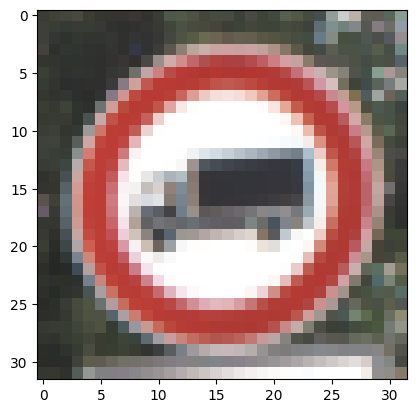

In [9]:
# Checking whether our image and data matches
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i] #labels are at the end

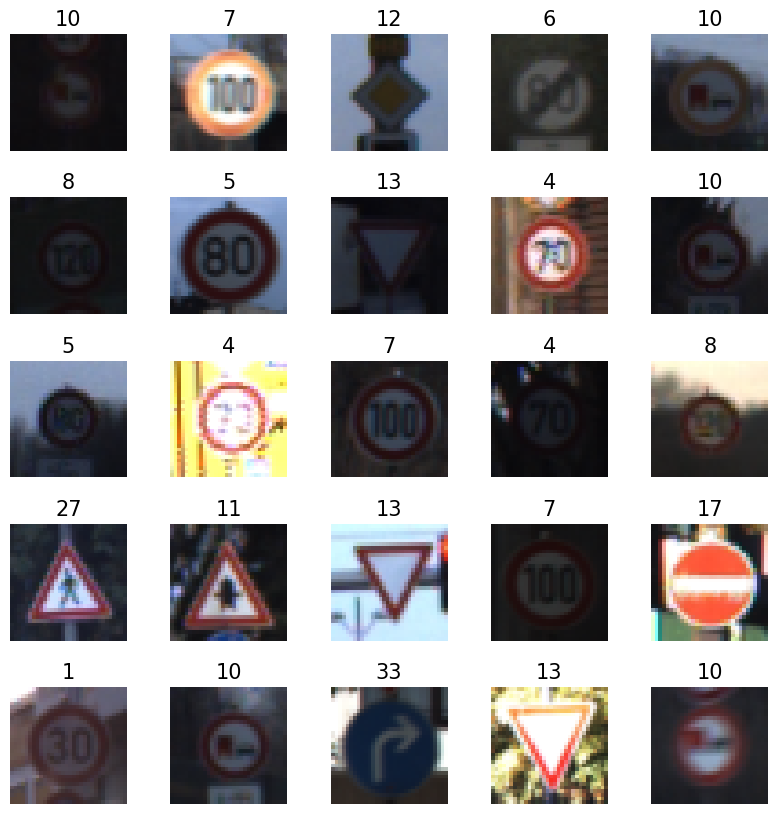

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    # Select a random number
  index = np.random.randint(0,n_training)
    # read and display an image with the selected index   
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index],fontsize=15)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4) 
    

        

# TASK #3: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [16]:
# Obtaining single channel image  
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)
X_valid_gray=np.sum(X_valid/3,axis=3,keepdims=True)

In [17]:
X_train_gray.shape
X_test_gray.shape
X_valid_gray.shape

(4410, 32, 32, 1)

In [18]:
# Normalization
X_train_gray_norm=(X_train_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128
X_valid_gray_norm=(X_valid_gray-128)/128

In [19]:
X_train_gray_norm

array([[[[-0.79947917],
         [-0.80729167],
         [-0.80989583],
         ...,
         [-0.78125   ],
         [-0.78385417],
         [-0.78125   ]],

        [[-0.79166667],
         [-0.8046875 ],
         [-0.8046875 ],
         ...,
         [-0.78125   ],
         [-0.78645833],
         [-0.78645833]],

        [[-0.79166667],
         [-0.8046875 ],
         [-0.80729167],
         ...,
         [-0.78125   ],
         [-0.78645833],
         [-0.78645833]],

        ...,

        [[-0.80729167],
         [-0.79947917],
         [-0.79427083],
         ...,
         [-0.80729167],
         [-0.80729167],
         [-0.80208333]],

        [[-0.80729167],
         [-0.79947917],
         [-0.79166667],
         ...,
         [-0.80729167],
         [-0.80729167],
         [-0.80989583]],

        [[-0.8046875 ],
         [-0.796875  ],
         [-0.79427083],
         ...,
         [-0.80989583],
         [-0.81510417],
         [-0.82291667]]],


       [[[-0.80208333],


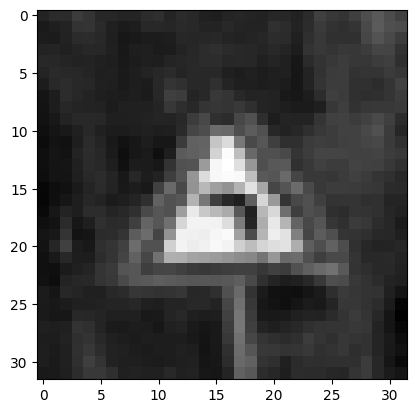

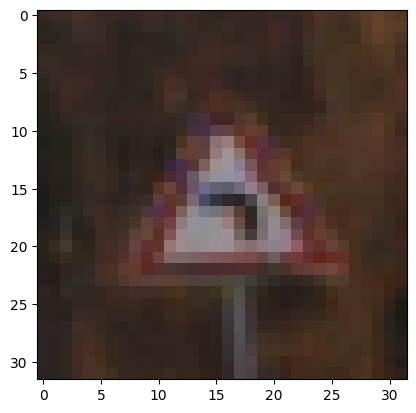

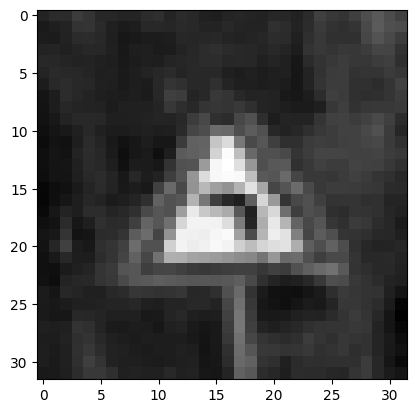

In [21]:
i = random.randint(1, len(X_train_gray))
# gray image
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
# original image
plt.imshow(X_train[i])
plt.figure()
# normalized image
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [ ]:
from tensorflow.keras import datasets, layers, models


# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

In [ ]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

In [ ]:
history.history.keys()

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# CONGRATULATIONS ON FINISHING THE PROJECT!

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }